In [480]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

In [481]:
basePath = '/Volumes/G-RAID/simulations/unprocessed/Illustris/Illustris-1'
snapNum = 135
m_dm = 6.3*10**6.0 #dark matter particle mass
little_h = 0.704
Lbox = np.array([75.0]*3)

In [482]:
# particle types
"""
0. gas
1. dark matter
2. un-used
3. tracers
4. stars/wind
5. black holes
"""

'\n0. gas\n1. dark matter\n2. un-used\n3. tracers\n4. stars/wind\n5. black holes\n'

# Galaxy Shapes and Orientations in Illustris

## precomputed shapes

In [483]:
# open shapes file
import h5py
f = h5py.File(basePath + '/snapdir_135/stellar_circs.hdf5', 'r')
data = f.get('Snapshot_135')

In [484]:
ids = data['SubfindID'].value
eig_vals = data['MassTensorEigenVals'].value
eig_vals = data['ReducedMassTensorEigenVals'].value
print(len(ids))

27345


In [485]:
a = eig_vals[:,2]
b = eig_vals[:,1]
c = eig_vals[:,0]

c_to_a = eig_vals[:,0]/eig_vals[:,2]
b_to_a = eig_vals[:,1]/eig_vals[:,2]

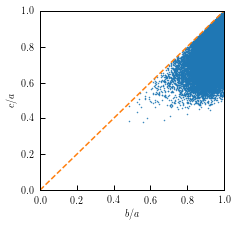

In [487]:
plt.figure(figsize=(3.3,3.3))
plt.plot(b_to_a, c_to_a, '.' ,ms=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], '--')
plt.xlabel(r'$b/a$')
plt.ylabel(r'$c/a$')
plt.show()

## custom shape calculations

In [489]:
from astropy.table import Table
t_1 = Table.read('../data/galaxy_shapes_1.dat', format='ascii')

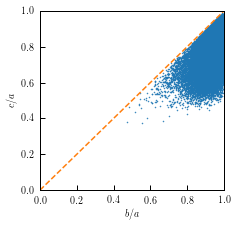

In [490]:
plt.figure(figsize=(3.3,3.3))
plt.plot(t_1['b']/t_1['a'], t_1['c']/t_1['a'], '.' ,ms=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], '--')
plt.xlabel(r'$b/a$')
plt.ylabel(r'$c/a$')
plt.show()

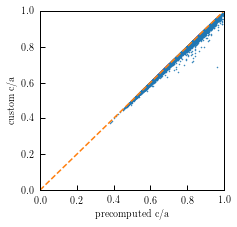

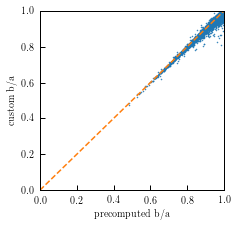

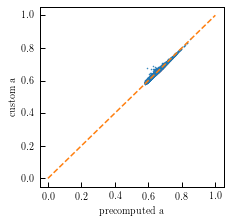

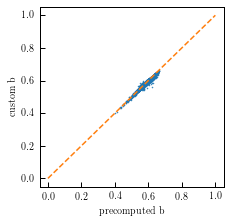

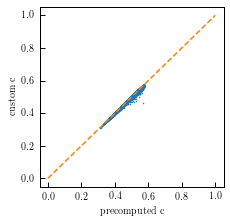

In [491]:
plt.figure(figsize=(3.3,3.3))
plt.plot(c_to_a, t_1['c']/t_1['a'], '.' ,ms=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], '--')
plt.xlabel('precomputed c/a')
plt.ylabel('custom c/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(b_to_a, t_1['b']/t_1['a'], '.' ,ms=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1], [0,1], '--')
plt.xlabel('precomputed b/a')
plt.ylabel('custom b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(eig_vals[:,2], t_1['a'], '.' ,ms=1)
plt.plot([0,1], [0,1], '--')
plt.xlabel('precomputed a')
plt.ylabel('custom a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(eig_vals[:,1], t_1['b'], '.' ,ms=1)
plt.plot([0,1], [0,1], '--')
plt.xlabel('precomputed b')
plt.ylabel('custom b')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(eig_vals[:,0], t_1['c'], '.' ,ms=1)
plt.plot([0,1], [0,1], '--')
plt.xlabel('precomputed c')
plt.ylabel('custom c')
plt.show()

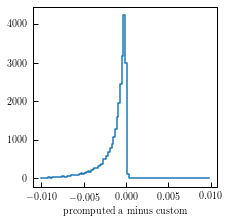

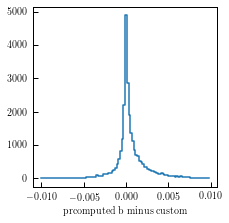

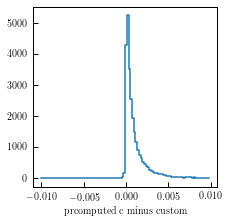

In [492]:
bins = np.linspace(-0.01,0.01,100)
counts = np.histogram(a-t_1['a'],bins=bins)[0]

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1],counts, where='post')
plt.xlabel('prcomputed a minus custom')
plt.show()

counts = np.histogram(b-t_1['b'],bins=bins)[0]

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1],counts, where='post')
plt.xlabel('prcomputed b minus custom')
plt.show()

counts = np.histogram(c-t_1['c'],bins=bins)[0]

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1],counts, where='post')
plt.xlabel('prcomputed c minus custom')
plt.show()

In [495]:
# examine outliers
ind = np.argmax(np.fabs(t_1['b']/t_1['a']-b_to_a))
print(b_to_a[ind], t_1['b'][ind]/t_1['a'][ind])
print(gal_coords[t_1['gal_id'][ind]])

0.9849513 0.8119409529511981
[56.580006 66.42526  23.938755]


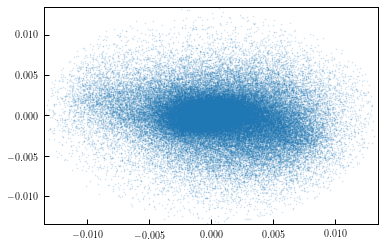

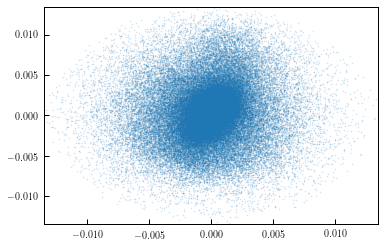

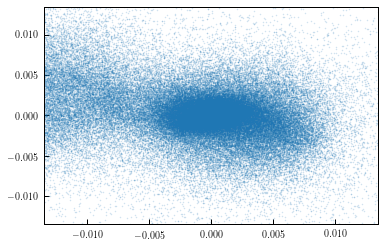

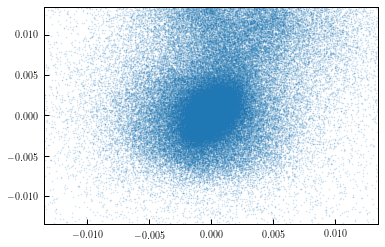

In [496]:
gal_id = t_1['gal_id'][ind]

# load galaxy position
gal_positions = loadSubhalos(basePath, snapNum, fields=['SubhaloPos'])/1000.0
gal_position = gal_positions[gal_id]

# half mass radius
gal_rhalfs = loadSubhalos(basePath, snapNum, fields=['SubhaloHalfmassRadType'])[:,4]/1000.0
gal_rhalf = gal_rhalfs[gal_id]

# load stellar particles
ptcl_coords = loadSubhalo(basePath, snapNum, gal_id, 4, fields=['Coordinates'])/1000.0
ptcl_masses = loadSubhalo(basePath, snapNum, gal_id, 4, fields=['Masses'])*10.0**10
sf_time = loadSubhalo(basePath, snapNum, gal_id, 4, fields=['GFM_StellarFormationTime'])
is_a_star = (sf_time>=0.0) # don't use wind particles

# account for PBCs
dx = ptcl_coords[:,0] - gal_position[0]
dy = ptcl_coords[:,1] - gal_position[1]
dz = ptcl_coords[:,2] - gal_position[2]

ptcl_coords = np.vstack((dx,dy,dz)).T

mask = (dx > Lbox[0]/2.0)
dx[mask] = dx[mask] - Lbox[0]
mask = (dx < -Lbox[0]/2.0)
dx[mask] = dx[mask] + Lbox[0]

mask = (dy > Lbox[1]/2.0)
dy[mask] = dy[mask] - Lbox[1]
mask = (dy < -Lbox[1]/2.0)
dy[mask] = dy[mask] + Lbox[1]

mask = (dz > Lbox[2]/2.0)
dz[mask] = dz[mask] - Lbox[2]
mask = (dz < -Lbox[2]/2.0)
dz[mask] = dz[mask] + Lbox[2]

#ptcl_coords = np.vstack((dx,dy,dz)).T

r = np.sqrt(np.sum(ptcl_coords**2, axis=1))/gal_rhalf
mask = (r<=2.0) & (is_a_star)

I = reduced_inertia_tensors(ptcl_coords[mask], ptcl_masses[mask])

evals, evecs = np.linalg.eigh(I)
evals = np.sqrt(evals)

alpha = np.log10(ptcl_masses)/np.max(np.log10(ptcl_masses))

plt.figure()
plt.plot(ptcl_coords[mask,0], ptcl_coords[mask,1], '.', ms=1, alpha=0.2)
plt.xlim([-2*gal_rhalf, 2*gal_rhalf])
plt.ylim([-2*gal_rhalf, 2*gal_rhalf])
plt.show()

plt.figure()
plt.plot(ptcl_coords[mask,1], ptcl_coords[mask,2], '.', ms=1, alpha=0.2)
plt.xlim([-2*gal_rhalf, 2*gal_rhalf])
plt.ylim([-2*gal_rhalf, 2*gal_rhalf])
plt.show()

plt.figure()
plt.plot(ptcl_coords[:,0], ptcl_coords[:,1], '.', ms=1, alpha=0.2)
plt.xlim([-2*gal_rhalf, 2*gal_rhalf])
plt.ylim([-2*gal_rhalf, 2*gal_rhalf])
plt.show()

plt.figure()
plt.plot(ptcl_coords[:,1], ptcl_coords[:,2], '.', ms=1, alpha=0.2)
plt.xlim([-2*gal_rhalf, 2*gal_rhalf])
plt.ylim([-2*gal_rhalf, 2*gal_rhalf])
plt.show()

## custom calculated shapes

In [393]:
from illustris_python.snapshot import loadHalo, snapPath, loadSubhalo
from illustris_python.groupcat import gcPath, loadHalos, loadSubhalos

In [394]:
# FoF halo IDs
x = loadHalos(basePath, snapNum, fields=['GroupMass'])
halo_ids = np.array(range(0,len(x)))

In [448]:
x = loadSubhalos(basePath, snapNum)
for key in x.keys():
    print(key)

gal_id = np.arange(0,len(x['SubhaloGrNr']))
gal_stellar_mass = x['SubhaloMassInRadType'][:,4] # mass within 2*R_half
gal_rhalf = x['SubhaloHalfmassRadType'][:,4]/1000.0
gal_coords = x['SubhaloCM']/1000.0
gal_coords = x['SubhaloPos']/1000.0

SubhaloPos
SubhaloBHMdot
SubhaloVmax
SubhaloWindMass
SubhaloGasMetallicityMaxRad
SubhaloVelDisp
SubhaloSFR
SubhaloStarMetallicityMaxRad
SubhaloLen
SubhaloSFRinHalfRad
SubhaloStellarPhotometrics
SubhaloGasMetallicity
SubhaloBHMass
SubhaloIDMostbound
SubhaloMassType
SubhaloStellarPhotometricsMassInRad
SubhaloHalfmassRad
SubhaloParent
SubhaloSpin
SubhaloStarMetallicityHalfRad
SubhaloVel
SubhaloLenType
SubhaloGasMetallicitySfrWeighted
SubhaloGasMetallicityHalfRad
SubhaloMassInRad
SubhaloGrNr
SubhaloMassInHalfRad
SubhaloSFRinRad
SubhaloMassInMaxRad
SubhaloHalfmassRadType
SubhaloMassInMaxRadType
SubhaloCM
SubhaloStarMetallicity
count
SubhaloMassInHalfRadType
SubhaloMass
SubhaloMassInRadType
SubhaloVmaxRad
SubhaloSFRinMaxRad
SubhaloStellarPhotometricsRad
SubhaloGasMetallicitySfr


In [118]:
# galaxy selection

mask = np.log10(gal_stellar_mass*10**(10)/0.7)>=9
np.sum(mask)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


27432

In [119]:
ii = 0
i = gal_id[mask][ii]
ptcl_coords = loadSubhalo(basePath, snapNum, i, 4, fields=['Coordinates'])/1000.0 - gal_coords[i]
ptcl_masses = loadSubhalo(basePath, snapNum, i, 4, fields=['Masses'])*10.0**10

r = np.sqrt(np.sum(ptcl_coords**2,axis=1))/gal_rhalf[i]

In [120]:
r_mask = (r<=2)

In [121]:
from inertia_tensors import inertia_tensors, reduced_inertia_tensors

I = inertia_tensors(ptcl_coords[r_mask])
%timeit I = reduced_inertia_tensors(ptcl_coords[r_mask], ptcl_masses[r_mask])
evals, evecs = np.linalg.eigh(I)
evals = np.sqrt(evals)
print(evals[:,0]/evals[:,2], evals[:,1]/evals[:,2])
print(c_to_a[ii], b_to_a[ii])
print(i, ids[i])

1 loop, best of 3: 225 ms per loop
[0.67665117] [0.71160353]
0.6792607 0.71419233
0 0


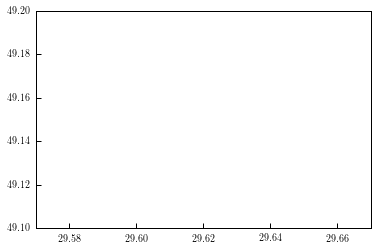

In [122]:
plt.figure()
plt.plot(ptcl_coords[:,0],ptcl_coords[:,1], '.', ms=1, alpha=0.5)
plt.xlim([29.62-0.05,29.62+0.05])
plt.ylim([49.15-0.05,49.15+0.05])
plt.show()

# function to calculate shapes

In [155]:
def galaxy_shape(gal_id, basePath, snapNum, Lbox, reduced=True):
    """
    Parameters
    ----------
    gal_id : int
    
    basepath : string
    
    snapNum : int
    
    Lbox : array_like
    
    reduced : bool
    
    Returns
    -------
    eig_vals, eig_vecs
    """
    
    # load galaxy position
    gal_positions = loadSubhalos(basePath, snapNum, fields=['SubhaloPos'])/1000.0
    gal_position = gal_positions[gal_id]
    
    # half mass radius
    gal_rhalfs = loadSubhalos(basePath, snapNum, fields=['SubhaloHalfmassRadType'])[:,4]/1000.0
    gal_rhalf = gal_rhalfs[gal_id]
    
    # load stellar particles
    ptcl_coords = loadSubhalo(basePath, snapNum, gal_id, 4, fields=['Coordinates'])/1000.0
    ptcl_masses = loadSubhalo(basePath, snapNum, gal_id, 4, fields=['Masses'])*10.0**10
    
    # account for PBCs
    dx = ptcl_coords[:,0] - gal_position[0]
    dy = ptcl_coords[:,1] - gal_position[1]
    dz = ptcl_coords[:,2] - gal_position[2]
    
    mask = (dx > Lbox[0]/2.0)
    dx[mask] = dx[mask] - Lbox[0]
    mask = (dx < -Lbox[0]/2.0)
    dx[mask] = dx[mask] + Lbox[0]
    
    mask = (dy > Lbox[1]/2.0)
    dy[mask] = dx[mask] - Lbox[1]
    mask = (dy < -Lbox[1]/2.0)
    dy[mask] = dx[mask] + Lbox[1]
    
    mask = (dz > Lbox[2]/2.0)
    dz[mask] = dx[mask] - Lbox[2]
    mask = (dz < -Lbox[2]/2.0)
    dz[mask] = dx[mask] + Lbox[2]
    
    ptcl_coords = np.vstack((dx,dy,dz)).T

    r = np.sqrt(np.sum(ptcl_coords**2, axis=1))/gal_rhalf
    mask = r<=2.0
    
    if reduced:
        I = reduced_inertia_tensors(ptcl_coords[mask])
    else:
        I = inertia_tensors(ptcl_coords[mask])
    
    evals, evecs = np.linalg.eigh(I)
    evals = np.sqrt(evals) 
    
    return evals[0], evecs[0]

In [156]:
evals, evecs = galaxy_shape(0, basePath, snapNum, Lbox)

In [158]:
for i in ids[:20]:
    evals, evecs = galaxy_shape(i, basePath, snapNum, Lbox)
    print(evals)

[0.51096491 0.52618931 0.679735  ]
[0.48031057 0.61059734 0.62966074]
[0.40198721 0.63937506 0.65544322]
[0.39088657 0.64135162 0.6602089 ]
[0.45984592 0.58324051 0.66960603]
[0.47145892 0.61609643 0.63099261]
[0.43495029 0.62302273 0.65012378]
[0.45480314 0.5441069  0.70505445]
[0.41166064 0.58947031 0.69502537]
[0.41445455 0.62828257 0.65839839]
[0.47920343 0.58339194 0.65575751]
[0.48560956 0.49789028 0.71853227]
[0.45588437 0.61349435 0.644821  ]
[0.3842196  0.62943232 0.67541858]
[0.46099351 0.54356973 0.70143919]
[0.40930803 0.63703539 0.65318669]
[0.4205198  0.63369712 0.64930044]
[0.37935643 0.60611444 0.69908082]
[0.40872286 0.56669314 0.71540514]
[0.45937009 0.56833574 0.68262259]


In [ ]:
galaxy_stellar_mass = loadSubhalos(basePath, snapNum, fields=['SubhaloMassInRadType'])[:,4]*10**10.0

In [6]:
# make cut on total umber of particles in host halo
m_halo = loadHalos(basePath, snapNum, fields=['GroupMassType'])[:,1]*10**10.0
n_dm = m_halo/m_dm
mask = (n_dm>500)
halo_ids = halo_ids[mask]

In [7]:
# get galaxies which are in a host halo
host_halo_ids = loadSubhalos(basePath, snapNum, fields=['SubhaloGrNr'])
galaxy_coords = loadSubhalos(basePath, snapNum, fields=['SubhaloCM'])/1000.0
galaxy_stellar_mass = loadSubhalos(basePath, snapNum, fields=['SubhaloMassInRadType'])[:,4]*10**10.0
stellar_half_mass_radius = loadSubhalos(basePath, snapNum, fields=['SubhaloHalfmassRadType'])[:,4]/1000.0

In [8]:
i=10
ptcl_coords = loadHalo(basePath, snapNum, halo_ids[i], 4, fields=['Coordinates'])/1000.0
ptcl_masses = loadHalo(basePath, snapNum, halo_ids[i], 4, fields=['Masses'])*10*10.0

In [9]:
galaxy_mask = (host_halo_ids==halo_ids[i]) & (stellar_half_mass_radius>0) &  (galaxy_stellar_mass>10**8)

In [10]:
from halotools.mock_observables import reduced_inertia_tensor_per_object, principal_axes_from_inertia_tensors

In [11]:
result, m = reduced_inertia_tensor_per_object(galaxy_coords[galaxy_mask], ptcl_coords,
                                              2*stellar_half_mass_radius[galaxy_mask],
                                              weights2=ptcl_masses,
                                              period=Lbox)

In [ ]:
result_1, m_1 = reduced_inertia_tensor_per_object(galaxy_coords[galaxy_mask], ptcl_coords,
                                              2*stellar_half_mass_radius[galaxy_mask],
                                              weights2=ptcl_masses, inertia_tensor_0=result,
                                              period=Lbox)

result_2, m_2 = reduced_inertia_tensor_per_object(galaxy_coords[galaxy_mask], ptcl_coords,
                                              2*stellar_half_mass_radius[galaxy_mask],
                                              weights2=ptcl_masses, inertia_tensor_0=result_1,
                                              period=Lbox)

In [16]:
from halotools.mock_observables import reduced_inertia_tensor_per_object
from halotools.mock_observables import principal_axes_from_inertia_tensors
from halotools.mock_observables import axis_ratios_from_inertia_tensors, eigenvectors, eigenvalues
from halotools.mock_observables.pair_counters import pairwise_distance_elliptical
from halotools.mock_observables.tensor_calculations.reduced_inertia_tensor import rotation3d

def iterative_reduced_inertia_tensor(galaxy_coords, ptcl_coords, galaxy_size, ptcl_mass, Lbox, q_tol=0.01, s_tol=0.01):
    """
    iterative caclulation of the reduced inertia tensor
    """
    
    # initial calculation
    result_0, m = reduced_inertia_tensor_per_object(galaxy_coords, ptcl_coords, galaxy_size,
                                                    weights2=ptcl_mass, period=Lbox)
    m = np.repeat(m, 9).reshape(np.shape(result_0))
    result_0 = result_0/m
    
    l0, l1, l2 = np.sqrt(eigenvalues(result_0))
    q0, s0 = axis_ratios_from_inertia_tensors(result_0)
    
    max_ed = galaxy_size
    
    # iteratively re-calculate the inertia tensor
    i = 0 # counter
    imax = 10
    keep_going=True
    print(0, 0,0, q0[0], s0[0])
    while keep_going==True:
        result, m = reduced_inertia_tensor_per_object(galaxy_coords, ptcl_coords, galaxy_size,
                                                      weights2=ptcl_mass, inertia_tensor_0=result_0,
                                                      period=Lbox, ed_max=max_ed)
        m = np.repeat(m, 9).reshape(np.shape(result))
        result = result/m
        q, s = axis_ratios_from_inertia_tensors(result)
        
        q_res = np.fabs(q-q0)/q
        s_res = np.fabs(s-s0)/s
        
        if (np.all(q_res<=q_tol) & np.all(s_res<=s_res)) | (i>=imax):
            keep_going=False
        
        q0 = q*1.0
        s0 = s*1.0
        result_0=result*1.0
        
        print(i, np.max(q_res), np.max(s_res), q[0], s[0])
        e0, e1, e2 = eigenvectors(result)
    
    return result    

In [17]:
result, m = iterative_reduced_inertia_tensor(galaxy_coords[galaxy_mask], ptcl_coords, 2*stellar_half_mass_radius[galaxy_mask],
                                       ptcl_masses, Lbox)

0 0 0 0.437277815833 0.343417709342
0 1.28605545983 1.3662988512 0.212924147194 0.152271002839
0 1.30443541145 1.28764788194 0.112119028209 0.0756445679514
0 1.32143062857 1.16809912886 0.0597637595833 0.040808737315


KeyboardInterrupt: 

In [13]:
evals, evecs = np.linalg.eigh(result)
s = evals[:,0]/evals[:,2]
q = evals[:,1]/evals[:,2]

In [14]:
evals, evecs = np.linalg.eigh(result_1)
s1 = evals[:,0]/evals[:,2]
q1 = evals[:,1]/evals[:,2]

evals, evecs = np.linalg.eigh(result_2)
s2 = evals[:,0]/evals[:,2]
q2 = evals[:,1]/evals[:,2]

In [19]:
qs = np.vstack((q,q1,q2)).T
ss = np.vstack((s,s1,s2)).T

In [17]:
qs

array([[ 0.19121189,  0.21355075,  0.17172712],
       [ 0.94903825,  0.95125223,  0.94372349],
       [ 0.73657736,  0.80615367,  0.77185794],
       [ 0.310052  ,  0.40721345,  0.36663106],
       [ 0.83604319,  0.7358652 ,  0.77658777],
       [ 0.36813378,  0.47963775,  0.3040968 ],
       [ 0.16080697,  0.22032153,  0.20264218],
       [ 0.59363683,  0.81189787,  0.67189922],
       [ 0.3019198 ,  0.25004851,  0.47745811],
       [ 0.93720893,  0.810316  ,  0.82146163],
       [ 0.28926856,  0.40080913,  0.20778883],
       [ 0.95273738,  0.82187195,  0.89462531],
       [ 0.71154973,  0.62899116,  0.65302058],
       [ 0.80921064,  0.84727468,  0.73402453],
       [ 0.90194107,  0.83945856,  0.8006429 ],
       [ 0.82112367,  0.69611577,  0.6264364 ],
       [ 0.82594641,  0.67186944,  0.71866531],
       [ 0.95500281,  0.90446451,  0.81852647],
       [ 0.94311562,  0.76280605,  0.72446889],
       [ 0.73095718,  0.65580196,  0.6161522 ],
       [ 0.49144306,  0.43884108,  0.364

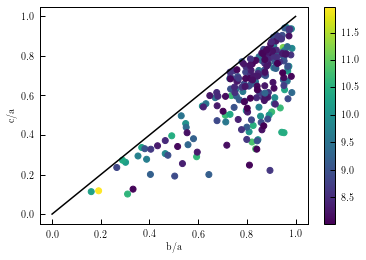

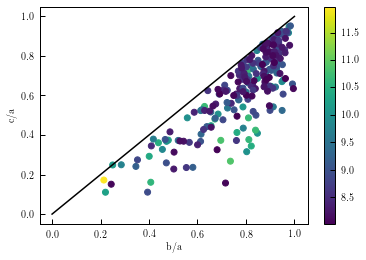

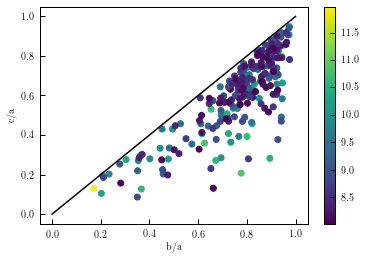

In [15]:
plt.figure()
plt.scatter(q, s, c=np.log10(galaxy_stellar_mass[galaxy_mask]))
plt.plot([0,1],[0,1],'-', color='black')
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.colorbar()
plt.show()

plt.figure()
plt.scatter(q1, s1, c=np.log10(galaxy_stellar_mass[galaxy_mask]))
plt.plot([0,1],[0,1],'-', color='black')
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.colorbar()
plt.show()

plt.figure()
plt.scatter(q2, s2, c=np.log10(galaxy_stellar_mass[galaxy_mask]))
plt.plot([0,1],[0,1],'-', color='black')
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.colorbar()
plt.show()

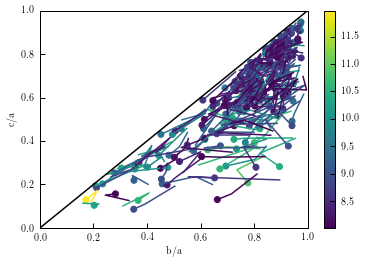

In [44]:
N = len(m_1)
NN = 3
plt.figure()
min_mass = np.min(np.log10(galaxy_stellar_mass[galaxy_mask]))
max_mass = np.max(np.log10(galaxy_stellar_mass[galaxy_mask]))
for i in range(0,N):
    mass = np.log10(galaxy_stellar_mass[galaxy_mask])[i]
    c = plt.cm.viridis((mass-min_mass)/(max_mass-min_mass))
    plt.plot(qs[i,:], ss[i,:], '-', color=c)
plt.plot([0,1],[0,1],'-', color='black')
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.scatter(q2, s2, c=np.log10(galaxy_stellar_mass[galaxy_mask]))
plt.colorbar()
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()